## <a id='toc1_1_'></a>[Project Overview](#toc0_)

In this project, you will conduct a comprehensive cohort analysis based on data provided by IronHack Payments. The main objective is to analyze user cohorts defined by the month of creation of their first cash advance. You will track the monthly evolution of key metrics for these cohorts, enabling IronHack Payments to gain valuable insights into user behavior and the performance of their financial services.

### <a id='toc1_1_1_'></a>[Metrics to Analyze](#toc0_)

You will calculate and analyze the following metrics for each cohort:

1. **Frequency of Service Usage:** Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.
2. **Incident Rate:** Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.
3. **Revenue Generated by the Cohort:** Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.
4. **New Relevant Metric:** Propose and calculate a new relevant metric that provides additional insights into user behavior or the performance of IronHack Payments' services.

### <a id='toc1_1_2_'></a>[Deliverables](#toc0_)

1. **Python Code:** Provide well-documented Python code that conducts the cohort analysis, including data loading, preprocessing, cohort creation, metric calculation, and visualization.
2. **Tableau Dashboard**: Publish a dashboard in Tableau Public regarding your analysis.
3. **Exploratory Data Analysis Report:** Prepare a report summarizing the findings from your exploratory data analysis. Include visualizations and insights that help understand the dataset.
4. **Data Quality Analysis Report:** Document the results of your data quality analysis, highlighting any issues and the steps taken to resolve them.
5. **Short Presentation:** Create a concise presentation (maximum of 4 slides) summarizing your findings from the cohort analysis and key insights gained from EDA and data quality analysis. This presentation should be suitable for sharing with the IronHack Payments team.

**Table of contents**<a id='toc0_'></a>    
- [Project Overview](#toc1_1_)    
    - [Metrics to Analyze](#toc1_1_1_)    
    - [Deliverables](#toc1_1_2_)    
- [Data Extraction](#toc2_)    
- [Data Quality & Cleaning](#toc3_)    
    - [Data Quality function](#toc3_1_1_)    
  - [Cash database](#toc3_2_)    
  - [Fees Database](#toc3_3_)    
  - [Data cleaning](#toc3_4_)    
- [Exploratory Data Analyis (EDA)](#toc4_)    
    - [Cash_clean dataframe](#toc4_1_1_)    
    - [Fees dataframe](#toc4_1_2_)    
- [Cohort creation](#toc5_)    
- [Metrics analysis](#toc6_)    
  - [1.Frequency of service usage](#toc6_1_)    
    - [Frequency - analysis](#toc6_1_1_)    
  - [2.Retention Rate](#toc6_2_)    
    - [Retention Rate analysis](#toc6_2_1_)    
  - [3.Incident Rate](#toc6_3_)    
    - [Merge 2 DataFrames](#toc6_3_1_)    
    - [Incident Rate calculation](#toc6_3_2_)    
      - [Incident Rate over time](#toc6_3_2_1_)    
    - [Incident Rate - analysis](#toc6_3_3_)    
  - [4.Revenue Generated by the Cohort](#toc6_4_)    
    - [Revenue - analysis](#toc6_4_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Data Extraction](#toc0_)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cash = pd.read_csv(r"C:\Users\diplo\Desktop\MiniProject\project-1-ironhack-payments-2-en\project_dataset\extract - cash request - data analyst.csv")
fees = pd.read_csv(r"C:\Users\diplo\Desktop\MiniProject\project-1-ironhack-payments-2-en\project_dataset\extract - fees - data analyst.csv")

In [3]:
cash.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [4]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


# <a id='toc3_'></a>[Data Quality & Cleaning](#toc0_)
### <a id='toc3_1_1_'></a>[Data Quality function](#toc0_)
Created a function to check for missing values, duplicated rows, inconsistent data types. This function creates a copy of the database set when calling the function, thus, it can be applied to any dataset. We deleted the error handling part from the function to make it easier.

In [5]:
def data_quality(database_name):
    # Check if the input is a DataFrame and create a copy named "df".
    if isinstance(database_name, pd.DataFrame):
        df = database_name.copy()
        df_name = "provided DataFrame"
    else: 
        raise TypeError("Input must be a pandas DataFrame or its name (string).")
    
    # Create the dictionary to storage the report and create a copy of the original dataframe to work on data quality
    report = {}
    df_cleaned = df.copy()

    #Check for missing values:
    missing = df_cleaned.isnull().sum()
    print(f"\nMissing Values for '{df_name}'\n", missing)
    report['missing_values'] = missing.to_dict()
   
    #Check for duplicated rows:
    duplicates = df_cleaned.duplicated()
    num_duplicates = duplicates.sum()
    print(f"\nDuplicate Rows for '{df_name}'\nNumber of duplicate rows: {num_duplicates}")
    report['duplicate_rows'] = num_duplicates
    
    #Check for inconsistent data types:
    dtypes = df_cleaned.dtypes
    print(f"\nData Types for '{df_name}'\n", dtypes)
    report['data_types'] = dtypes.to_dict()
      
    # print(f"\n Data Quality Report for '{df_name}'")
    # for key, value in report.items():
    #     print(f"\n{key.replace('_', '').title()}:")
    #     if isinstance(value, dict):
    #         print(f" - {key}: {value}")
    #     elif isinstance(value, list) or not isinstance(value, str):
    #         print(f" - {value}")
    #     else:
    #         print(f" - {value}")
    
    return report       

## <a id='toc3_2_'></a>[Cash database](#toc0_)

In [6]:
#Display the report for data quality for Cash database
cash_quality_report = data_quality(cash)


Missing Values for 'provided DataFrame'
 id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

Duplicate Rows for 'provided DataFrame'
Number of duplicate rows: 0

Data Types for 'provided DataFrame'
 id                              int64
amount                        float64
status                         object
created_at                     object
updated_at                     object
user_id                       float64
moderated_at                   obj

## <a id='toc3_3_'></a>[Fees Database](#toc0_)

In [7]:
#Display the report for data quality for Fees database
fees_quality_report = data_quality(fees)


Missing Values for 'provided DataFrame'
 id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

Duplicate Rows for 'provided DataFrame'
Number of duplicate rows: 0

Data Types for 'provided DataFrame'
 id                   int64
cash_request_id    float64
type                object
status              object
category            object
total_amount       float64
reason              object
created_at          object
updated_at          object
paid_at             object
from_date           object
to_date             object
charge_moment       object
dtype: object


## <a id='toc3_4_'></a>[Data cleaning](#toc0_)
Based on the quality report and the requirements for this project, we:
- analyzed the columns for each dataset,
- removed unecessary columns,
- cleaned user id

Created 2 new DataFrames: 
- cash_clean
- fees_clean

In [8]:
columns_to_drop_cash = [
    'reason',
    'moderated_at',
    'deleted_account_id',
    'cash_request_date',
    'money_back_date',
    'transfer_type',
    'recovery_status',
    'reco_creation',
    'reco_last_update'
    'send_at'
]

cash_clean = cash.drop(columns=columns_to_drop_cash, errors='ignore').copy()
cash_clean = cash_clean.dropna(subset=['user_id'])
cash_clean.head()

,id,amount,status,created_at,updated_at,user_id,reimbursement_date,cash_request_received_date,send_at,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2020-01-09 19:05:21.596363+00,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2020-01-09 19:50:12.34778+00,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2020-01-09 19:13:35.825041+00,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2020-01-09 19:16:10.879606+00,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-06-05 22:00:00+00,NaN,NaN,NaN


In [9]:
columns_to_drop_fees = [
    'reason',
    'category',
    'paid_at',
    'from_date',
    'to_date'
]
fees_clean = fees.drop(columns=columns_to_drop_fees, errors='ignore').copy()
fees_clean.head()

,id,cash_request_id,type,status,total_amount,created_at,updated_at,charge_moment
0,6537,14941.0,instant_payment,rejected,5.0,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,after
1,6961,11714.0,incident,accepted,5.0,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,after
2,16296,23371.0,instant_payment,accepted,5.0,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,after
3,20775,26772.0,instant_payment,accepted,5.0,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,after
4,11242,19350.0,instant_payment,accepted,5.0,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,after


# <a id='toc4_'></a>[Exploratory Data Analyis (EDA)](#toc0_)
Running only basics EDA - time constrain

### <a id='toc4_1_1_'></a>[Cash_clean dataframe](#toc0_)

In [10]:
cash_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21867 entries, 0 to 23969
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          21867 non-null  int64  
 1   amount                      21867 non-null  float64
 2   status                      21867 non-null  object 
 3   created_at                  21867 non-null  object 
 4   updated_at                  21867 non-null  object 
 5   user_id                     21867 non-null  float64
 6   reimbursement_date          21867 non-null  object 
 7   cash_request_received_date  15591 non-null  object 
 8   send_at                     15542 non-null  object 
 9   reco_last_update            3140 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.8+ MB


In [11]:
cash_clean.describe()

,id,amount,user_id
count,21867.000000,21867.000000,21867.000000
mean,14280.978049,82.641240,32581.250789
std,7789.309858,26.669831,27618.565773
min,3.000000,1.000000,34.000000
25%,7919.000000,50.000000,10804.000000
50%,14757.000000,100.000000,23773.000000
75%,21028.500000,100.000000,46965.000000
max,27010.000000,200.000000,103719.000000


### <a id='toc4_1_2_'></a>[Fees dataframe](#toc0_)

In [12]:
fees_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   total_amount     21061 non-null  float64
 5   created_at       21061 non-null  object 
 6   updated_at       21061 non-null  object 
 7   charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.3+ MB


In [13]:
fees_clean.describe()

,id,cash_request_id,total_amount
count,21061.000000,21057.000000,21061.000000
mean,10645.355111,16318.449162,5.000237
std,6099.315256,6656.149949,0.034453
min,1.000000,1456.000000,5.000000
25%,5385.000000,11745.000000,5.000000
50%,10652.000000,17160.000000,5.000000
75%,15925.000000,21796.000000,5.000000
max,21193.000000,27010.000000,10.000000


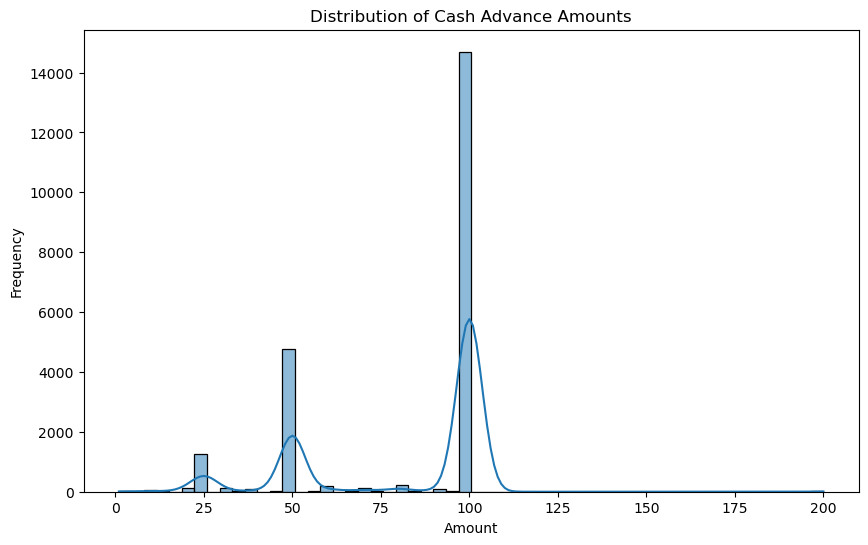

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(cash_clean['amount'], kde=True)  # kde adds a density estimate line
plt.title('Distribution of Cash Advance Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# <a id='toc5_'></a>[Cohort creation](#toc0_)


In [15]:
# Focusing on the 'cash' DataFrame first since it defines user behaviour and cohorts creation
# Convert 'created_at' to datetime
cash_clean['created_at'] = pd.to_datetime(cash_clean['created_at'], errors='coerce')

# Ensuring user_id is integer
cash_clean['user_id'] = cash_clean['user_id'].astype(int)

In [16]:
# calculating the month of each user's first request and storing it in new column "cohort"
cash_clean['cohort'] = (
    cash_clean.groupby('user_id')['created_at']
    .transform('min')                 # user's first cash request
    .dt.to_period('M')                # convert to Year-Month format (e.g., 2020-03)
)

C:\Users\diplo\AppData\Local\Temp\ipykernel_24076\1006764780.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .dt.to_period('M')                # convert to Year-Month format (e.g., 2020-03)


In [17]:
#check the new column -> it works!
cash_clean.head()

,id,amount,status,created_at,updated_at,user_id,reimbursement_date,cash_request_received_date,send_at,reco_last_update,cohort
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804,2020-01-09 19:05:21.596363+00,NaN,NaN,NaN,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231,2020-01-09 19:50:12.34778+00,NaN,NaN,NaN,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191,2020-01-09 19:13:35.825041+00,NaN,NaN,NaN,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761,2020-01-09 19:16:10.879606+00,NaN,NaN,NaN,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686,2020-06-05 22:00:00+00,NaN,NaN,NaN,2020-05


In [18]:
#Unique values from "Cohort" column are the names of our cohorts. Total of 13 cohorts.
cash_clean['cohort'].unique()

<PeriodArray>
['2019-12', '2020-05', '2020-06', '2020-02', '2020-04', '2020-01', '2020-03',
 '2019-11', '2020-09', '2020-07', '2020-10', '2020-08', '2020-11']
Length: 13, dtype: period[M]

# <a id='toc6_'></a>[Metrics analysis](#toc0_)

## <a id='toc6_1_'></a>[1.Frequency of service usage](#toc0_)
Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.

In [19]:
#New column "Transaction month" extracts the month from "created_at" and assigns it to the new column.
cash_clean['transaction_month'] = cash_clean['created_at'].dt.to_period('M')

C:\Users\diplo\AppData\Local\Temp\ipykernel_24076\4283348195.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_clean['transaction_month'] = cash_clean['created_at'].dt.to_period('M')


In [20]:
#"Cohort usage" shows the amount of Cash Requests made each month ("Transaction month"), separated by Cohort. Every cohort will show zero transactions in the previous months.
cohort_usage = cash_clean.groupby(['transaction_month', 'cohort']).size().unstack(fill_value=0)
cohort_usage

cohort,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
transaction_month,,,,,,,,,,,,,
2019-11,1,0,0,0,0,0,0,0,0,0,0,0,0
2019-12,1,229,0,0,0,0,0,0,0,0,0,0,0
2020-01,0,75,101,0,0,0,0,0,0,0,0,0,0
2020-02,0,46,21,90,0,0,0,0,0,0,0,0,0
2020-03,0,66,15,48,78,0,0,0,0,0,0,0,0
2020-04,1,66,35,48,39,229,0,0,0,0,0,0,0
2020-05,1,74,27,44,41,131,409,0,0,0,0,0,0
2020-06,0,76,25,42,43,133,274,1658,0,0,0,0,0
2020-07,0,63,28,37,34,97,238,926,1736,0,0,0,0


In [21]:
#Counting the total usage by cohort, the value checks out with the previous table.
cohort_usage_total = cash_clean['cohort'].value_counts()
cohort_usage_total

cohort
2020-10    4943
2020-06    4711
2020-07    3735
2020-09    2636
2020-08    1510
2020-05    1449
2019-12     893
2020-04     840
2020-02     423
2020-03     323
2020-01     321
2020-11      75
2019-11       8
Freq: M, Name: count, dtype: int64

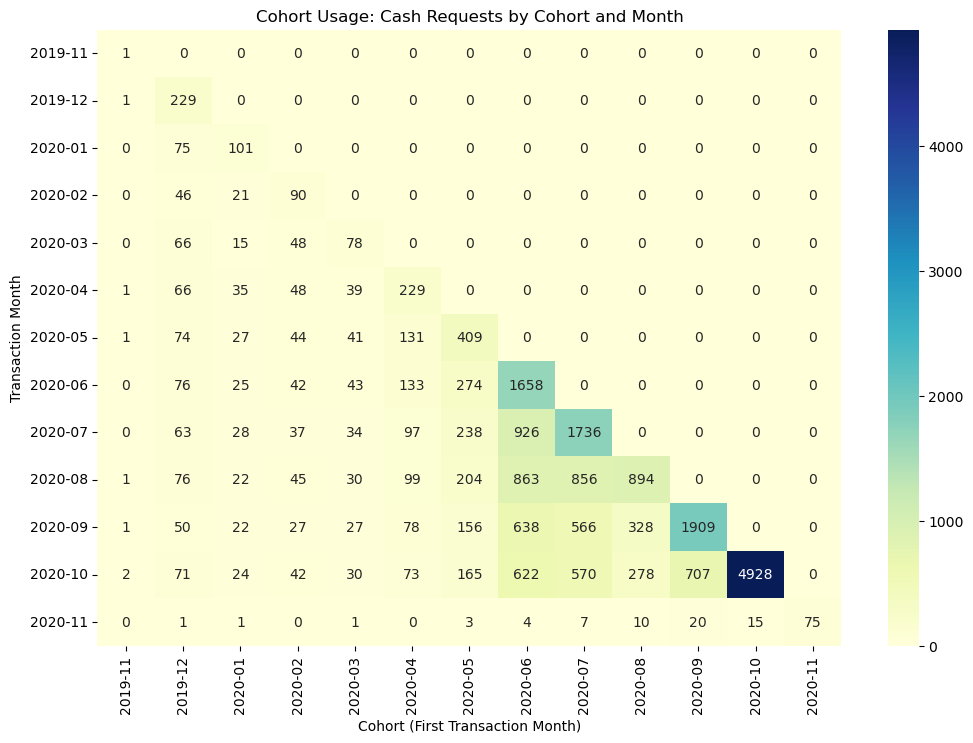

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_usage, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cohort Usage: Cash Requests by Cohort and Month')
plt.xlabel('Cohort (First Transaction Month)')
plt.ylabel('Transaction Month')
plt.show()

### <a id='toc6_1_1_'></a>[Frequency - analysis](#toc0_)
* **2019-11 Cohort:** This cohort shows minimal initial engagement, with only 1 Cash Request in November 2019 and another in December 2019. Subsequent activity shows no further requests within the analyzed period.
  
* **2020-04 Cohort:** As expected, this cohort's first Cash Requests occur in their inception month, April 2020, with a volume of 229 requests. A decrease to 131 requests is observed in May 2020, followed by continued activity.
  
* **Significant Increase in Request Frequency:** A significant increase in Cash Request frequency, from dozens to hundreds of requests, is evident from May 2020 onwards. This trend suggests a potential external factor, such as a marketing campaign or broader economic event, warranting further investigation.
* **Drastic Drop in Requests (November 2020):** The final month of the analysis, November 2020, exhibits a drastic drop in Cash Request volume. This decline indicates a potentially impactful event or change, which requires deeper investigation to determine the underlying cause.

## <a id='toc6_2_'></a>[2.Retention Rate](#toc0_)
Calculate the retention rate for each cohort.

In [23]:
cohort_users = cash_clean.groupby(['transaction_month', 'cohort'])['user_id'].nunique().unstack(fill_value=0)
cohort_users

cohort,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
transaction_month,,,,,,,,,,,,,
2019-11,1,0,0,0,0,0,0,0,0,0,0,0,0
2019-12,1,204,0,0,0,0,0,0,0,0,0,0,0
2020-01,0,69,90,0,0,0,0,0,0,0,0,0,0
2020-02,0,44,19,84,0,0,0,0,0,0,0,0,0
2020-03,0,56,14,44,69,0,0,0,0,0,0,0,0
2020-04,1,53,27,41,35,212,0,0,0,0,0,0,0
2020-05,1,66,23,41,32,104,369,0,0,0,0,0,0
2020-06,0,59,24,38,41,108,227,1338,0,0,0,0,0
2020-07,0,52,27,36,30,84,198,697,1294,0,0,0,0


In [24]:
# Extract the initial cohort size for each cohort
initial_cohort_size = cash_clean.groupby('cohort')['user_id'].nunique()

# Filter for the last transaction month (October 2020) - We didn't consider November, because it is not a full month and the data is skewed.
last_month = pd.Period('2020-10', freq='M')
last_month_users = cash_clean[cash_clean['transaction_month'] == last_month].groupby('cohort')['user_id'].nunique()

retention_rate = (last_month_users / initial_cohort_size).fillna(0)
retention_rate_per = (retention_rate * 100).round()
print(retention_rate)
print(retention_rate_per)

cohort
2019-11    1.000000
2019-12    0.289216
2020-01    0.255556
2020-02    0.416667
2020-03    0.391304
2020-04    0.278302
2020-05    0.401084
2020-06    0.405082
2020-07    0.394900
2020-08    0.371951
2020-09    0.385514
2020-10    1.000000
2020-11    0.000000
Freq: M, Name: user_id, dtype: float64
cohort
2019-11    100.0
2019-12     29.0
2020-01     26.0
2020-02     42.0
2020-03     39.0
2020-04     28.0
2020-05     40.0
2020-06     41.0
2020-07     39.0
2020-08     37.0
2020-09     39.0
2020-10    100.0
2020-11      0.0
Freq: M, Name: user_id, dtype: float64


C:\Users\diplo\AppData\Local\Temp\ipykernel_24076\2057810120.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cohort', y='Retention Rate (%)', data=retention_df, palette='viridis')


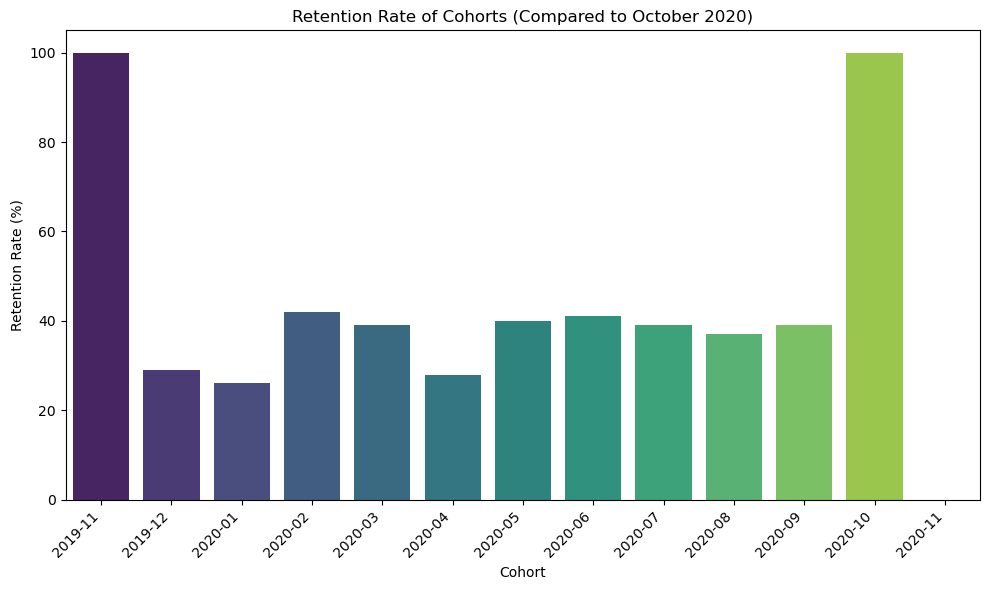

     Cohort  Retention Rate (%)
0   2019-11               100.0
1   2019-12                29.0
2   2020-01                26.0
3   2020-02                42.0
4   2020-03                39.0
5   2020-04                28.0
6   2020-05                40.0
7   2020-06                41.0
8   2020-07                39.0
9   2020-08                37.0
10  2020-09                39.0
11  2020-10               100.0
12  2020-11                 0.0


In [25]:
# Create a DataFrame for visualization
retention_df = pd.DataFrame({'Cohort': retention_rate_per.index,
                             'Retention Rate (%)': retention_rate_per.values})

# Sort by cohort for better visualization
retention_df = retention_df.sort_values(by='Cohort', ascending=True)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Cohort', y='Retention Rate (%)', data=retention_df, palette='viridis')
plt.title('Retention Rate of Cohorts (Compared to October 2020)')
plt.xlabel('Cohort')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print(retention_df)


### <a id='toc6_2_1_'></a>[Retention Rate analysis](#toc0_)
- Most of the cohorts between February 2020 and September 2020 show a retention rate in the range of approximately 37% to 42% when compared to their initial size and their activity in November 2019.
- We didn't consider November 2020 because the data doesn't contain a full month, therefore it is skewed. 
- We need more data to determine the correct retention rate of October 2020, since we don't have the full date from Nov 2020.
- The first cohort has a retention rate of 100% because it was only 1 user. Most likely a beta test. It should not be taken into consideration for further analysis.

## <a id='toc6_3_'></a>[3.Incident Rate](#toc0_)
Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.

### <a id='toc6_3_1_'></a>[Merge 2 DataFrames](#toc0_)
Merge "cash_clean" and "fees_clean" into "cashfees_clean" to continue the analysis.

In [26]:
#add the code to merge both DF
cashfees_clean = pd.merge(cash_clean, fees_clean, left_on = 'id', right_on = 'cash_request_id', how = 'inner')

In [27]:
cashfees_clean.head()

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,reimbursement_date,cash_request_received_date,send_at,reco_last_update,cohort,transaction_month,id_y,cash_request_id,type,status_y,total_amount,created_at_y,updated_at_y,charge_moment
0,23534,25.0,money_back,2020-10-23 15:20:26.163927+00:00,2020-12-18 13:08:29.099365+00,21465,2020-11-10 23:51:00+00,NaN,2020-10-23 15:21:26.878525+00,NaN,2020-09,2020-10,16460,23534.0,instant_payment,accepted,5.0,2020-10-23 15:21:35.895711+00,2020-10-23 15:21:35.89574+00,after
1,2203,100.0,money_back,2020-05-27 02:26:27.615190+00:00,2020-06-09 11:25:51.72636+00,2109,2020-07-15 02:26:27+00,2020-05-29,NaN,NaN,2019-12,2020-05,100,2203.0,postpone,accepted,5.0,2020-06-09 11:25:52.449808+00,2020-10-13 14:25:00.867548+00,before
2,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328,2020-08-03 22:00:00+00,2020-07-03,NaN,2020-08-11 22:27:58.255621+00,2020-07,2020-07,3733,6098.0,postpone,cancelled,5.0,2020-08-13 10:58:39.63422+00,2020-10-13 14:25:16.660127+00,after
3,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328,2020-08-03 22:00:00+00,2020-07-03,NaN,2020-08-11 22:27:58.255621+00,2020-07,2020-07,3734,6098.0,postpone,cancelled,5.0,2020-08-13 10:58:52.603153+00,2020-10-13 14:25:16.661371+00,after
4,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328,2020-08-03 22:00:00+00,2020-07-03,NaN,2020-08-11 22:27:58.255621+00,2020-07,2020-07,3735,6098.0,postpone,cancelled,5.0,2020-08-13 11:00:39.879521+00,2020-10-13 14:25:16.662449+00,after


### <a id='toc6_3_2_'></a>[Incident Rate calculation](#toc0_)

In [28]:
# incident_merge = pd.merge(incident_fees, cash_clean[['id', 'cohort', 'transaction_month']], left_on = 'cash_request_id', right_on= 'id', how = 'inner')
# incident_rate = (incident_merged.groupby(['cohort_month', 'cohort']).size().unstack(fill_value = 0))

In [29]:
incident_count = cashfees_clean[cashfees_clean["type"]=="incident"].shape[0]
total_cash_requests = cash_clean.shape[0]
incident_rate = incident_count / total_cash_requests * 100
print(f"Incident Rate: {incident_rate:.2f}%")

Incident Rate: 9.28%


#### <a id='toc6_3_2_1_'></a>[Incident Rate over time](#toc0_)

In [30]:
#Incident by month
monthly_incident_count = cashfees_clean[cashfees_clean['type'] == 'incident'].groupby('transaction_month').size().reset_index(name='incident_count')

#cash requests by month
total_requests_per_month = cashfees_clean.groupby('transaction_month').size().reset_index(name='total_requests')

monthly_data = pd.merge(monthly_incident_count, total_requests_per_month, on='transaction_month', how='outer').fillna(0).copy()
monthly_data['incident_rate'] = (monthly_data['incident_count'] / monthly_data['total_requests']) * 100

monthly_data

,transaction_month,incident_count,total_requests,incident_rate
0,2020-04,0.0,1,0.000000
1,2020-05,42.0,241,17.427386
2,2020-06,501.0,1544,32.448187
3,2020-07,604.0,1878,32.161874
4,2020-08,467.0,3357,13.911230
5,2020-09,368.0,4440,8.288288
6,2020-10,48.0,8577,0.559636
7,2020-11,0.0,113,0.000000


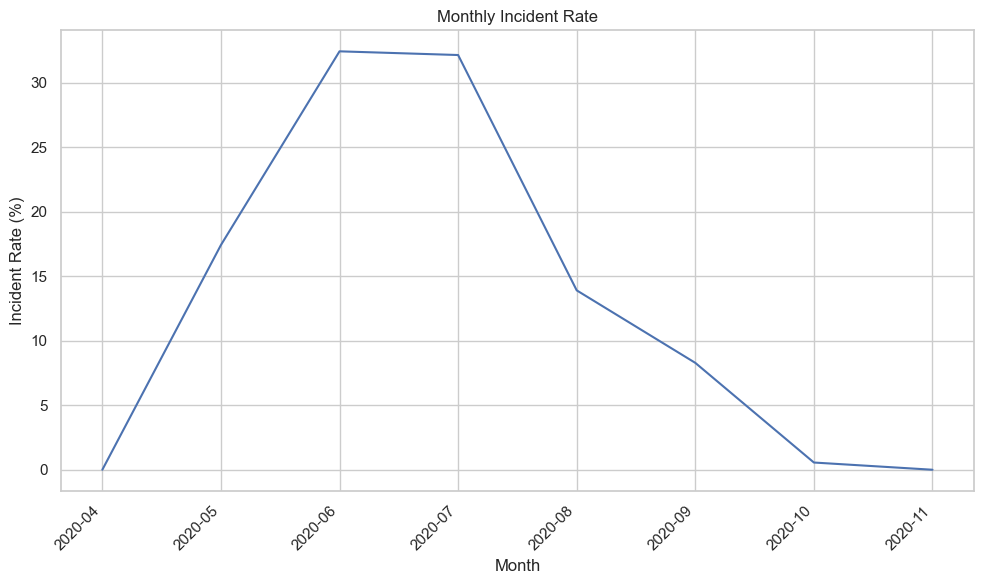

In [31]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_data['transaction_month'].astype(str), y='incident_rate', data=monthly_data)
plt.title('Monthly Incident Rate')
plt.xlabel('Month')
plt.ylabel('Incident Rate (%)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### <a id='toc6_3_3_'></a>[Incident Rate - analysis](#toc0_)
- Out of the total number of cash requests processed, approximately 9.28% were flagged as incidents. 
- This suggests that for every 100 cash requests, about 9.28% involved an issue or irregularity. 
- The current incident rate is moderately high. While not critical, it indicates that nearly 1 in every 10 requests involves an issue, suggesting room for process improvement or user guidance.

## <a id='toc6_4_'></a>[4.Revenue Generated by the Cohort](#toc0_)
Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.

In [32]:
fees_clean['created_at'] = pd.to_datetime(fees_clean['created_at'])
fees_clean['month'] = fees_clean['created_at'].dt.to_period('M')
revenue_by_month = fees_clean.groupby('month')['total_amount'].sum().reset_index()
print(revenue_by_month)

     month  total_amount
0  2020-05          80.0
1  2020-06        3845.0
2  2020-07        8095.0
3  2020-08       15260.0
4  2020-09       22860.0
5  2020-10       53835.0
6  2020-11        1335.0


C:\Users\diplo\AppData\Local\Temp\ipykernel_24076\4203811976.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fees_clean['month'] = fees_clean['created_at'].dt.to_period('M')


C:\Users\diplo\AppData\Local\Temp\ipykernel_24076\2656295670.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fees_clean['month'] = fees_clean['created_at'].dt.to_period('M')


    cohort    month  total_amount month_str
0  2019-11  2020-05          10.0   2020-05
1  2019-11  2020-06          10.0   2020-06
2  2019-11  2020-07           5.0   2020-07
3  2019-11  2020-08           5.0   2020-08
4  2019-11  2020-09          10.0   2020-09


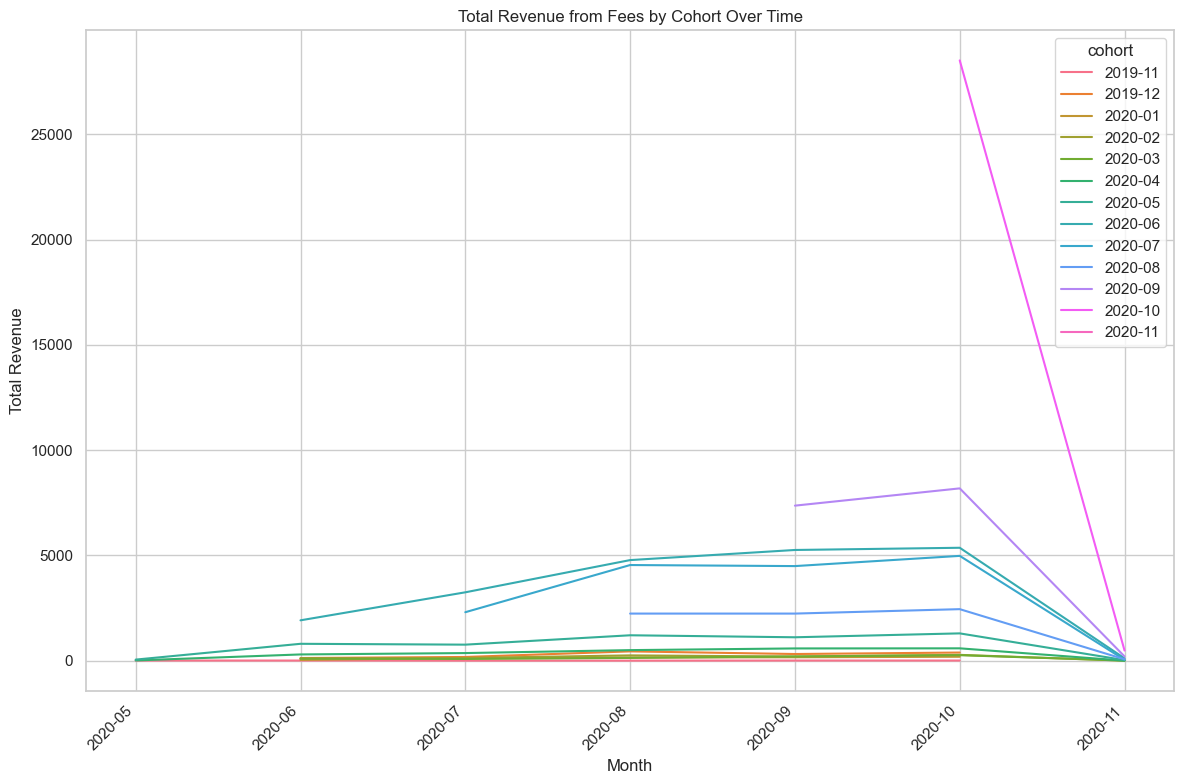

In [33]:
fees_clean['created_at'] = pd.to_datetime(fees_clean['created_at'])
fees_clean['month'] = fees_clean['created_at'].dt.to_period('M')
merged_data = pd.merge(cash_clean, fees_clean, left_on='id', right_on='cash_request_id', how='inner')
revenue_by_cohort_month = merged_data.groupby(['cohort', 'month'])['total_amount'].sum().reset_index()
revenue_by_cohort_month['month_str'] = revenue_by_cohort_month['month'].astype(str)

print(revenue_by_cohort_month.head())  # Check the structure of the data

plt.figure(figsize=(12, 8))
sns.lineplot(x='month_str', y='total_amount', hue='cohort', data=revenue_by_cohort_month)
plt.title('Total Revenue from Fees by Cohort Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


### <a id='toc6_4_1_'></a>[Revenue - analysis](#toc0_)
- The total revenue generated from fees accross the observed cohorts shows a strong upward trend from May to October 2020, followed by a sharp decline in November. 
- This decline could be due to seasonal trends, system downtime, policy change or user churn. 
- It's worth investigating what changed operationally or in user behaviour after October 2020.


Text(0.5, 1.0, 'Total Amount by Cohort')

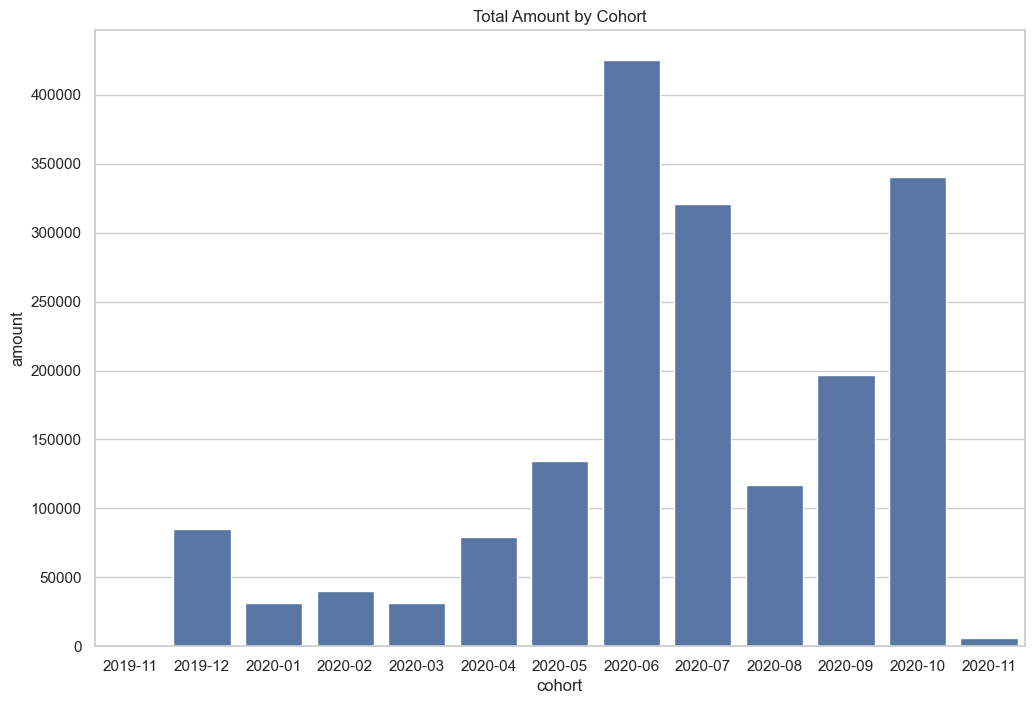

In [34]:
cohort_counts = cash_clean.groupby('cohort')["amount"].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='cohort', y='amount', data=cohort_counts)
plt.title('Total Amount by Cohort')